### 题目一：采用 scikit-learn 中的 RandomForestRegressor 对加利福尼亚房价数据集进行预测。

In [20]:
from sklearn.datasets import fetch_california_housing, load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

#### （1）导入数据集

In [12]:
data = fetch_california_housing()

# 将数据集转化为DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target  # 添加标签列


In [13]:
# 查看数据集的基本信息
print("数据集的维度:", df.shape)
print("\n数据集的前几行:")
print(df.head())

数据集的维度: (20640, 9)

数据集的前几行:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [14]:
# 查看特征和标签的分布
print("\n标签的分布情况:")
print(df['Target'].describe())


标签的分布情况:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: Target, dtype: float64


In [15]:
# 特征类型：检查每列的类型
print("\n特征类型:")
print(df.dtypes)


特征类型:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Target        float64
dtype: object


In [16]:
# 统计描述
print("\n数据集描述:")
print(df.describe())


数据集描述:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     

#### （2）模型建立：分别使用 DecisionTreeRegressor 和 RandomForestRegressor 建立预测模型（参数默认即可）。

In [17]:
# 将数据分为训练集和测试集
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化模型
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# 训练决策树回归模型
dt_model.fit(X_train, y_train)
# 训练随机森林回归模型
rf_model.fit(X_train, y_train)

# 在训练集和测试集上评分
dt_train_score = dt_model.score(X_train, y_train)
dt_test_score = dt_model.score(X_test, y_test)

rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)

# 输出模型评分（R^2）
print(f"Decision Tree - 训练集得分: {dt_train_score:.4f}, 测试集得分: {dt_test_score:.4f}")
print(f"Random Forest - 训练集得分: {rf_train_score:.4f}, 测试集得分: {rf_test_score:.4f}")

Decision Tree - 训练集得分: 1.0000, 测试集得分: 0.6221
Random Forest - 训练集得分: 0.9736, 测试集得分: 0.8051


#### （3）模型评估：输出训练集和测试集评分（以根均方误差 RMSE 为评估指标）。

In [18]:
# 计算预测值
dt_train_preds = dt_model.predict(X_train)
dt_test_preds = dt_model.predict(X_test)

rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

# 计算均方误差 MSE，然后开方得到 RMSE
dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_train_preds))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_test_preds))

rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_preds))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_preds))

# 输出 RMSE
print(f"Decision Tree - 训练集 RMSE: {dt_train_rmse:.4f}, 测试集 RMSE: {dt_test_rmse:.4f}")
print(f"Random Forest - 训练集 RMSE: {rf_train_rmse:.4f}, 测试集 RMSE: {rf_test_rmse:.4f}")


Decision Tree - 训练集 RMSE: 0.0000, 测试集 RMSE: 0.7037
Random Forest - 训练集 RMSE: 0.1880, 测试集 RMSE: 0.5053


In [21]:
# 加载葡萄酒数据集
wine_data = load_wine()

# 将数据集转化为DataFrame
df_wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df_wine['Target'] = wine_data.target  # 将目标列添加到数据集

# 划分训练集和测试集
X_wine = df_wine.drop('Target', axis=1)
y_wine = df_wine['Target']
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

# 初始化模型
dt_model_wine = DecisionTreeRegressor(random_state=42)
rf_model_wine = RandomForestRegressor(random_state=42)

# 训练决策树回归模型
dt_model_wine.fit(X_train_wine, y_train_wine)
# 训练随机森林回归模型
rf_model_wine.fit(X_train_wine, y_train_wine)

# 在训练集和测试集上评分
dt_train_score_wine = dt_model_wine.score(X_train_wine, y_train_wine)
dt_test_score_wine = dt_model_wine.score(X_test_wine, y_test_wine)

rf_train_score_wine = rf_model_wine.score(X_train_wine, y_train_wine)
rf_test_score_wine = rf_model_wine.score(X_test_wine, y_test_wine)

print(f"葡萄酒数据集 - 决策树：训练集得分: {dt_train_score_wine:.4f}, 测试集得分: {dt_test_score_wine:.4f}")
print(f"葡萄酒数据集 - 随机森林：训练集得分: {rf_train_score_wine:.4f}, 测试集得分: {rf_test_score_wine:.4f}")

# 计算预测值
dt_train_preds_wine = dt_model_wine.predict(X_train_wine)
dt_test_preds_wine = dt_model_wine.predict(X_test_wine)

rf_train_preds_wine = rf_model_wine.predict(X_train_wine)
rf_test_preds_wine = rf_model_wine.predict(X_test_wine)

# 计算均方误差 MSE，然后开方得到 RMSE
dt_train_rmse_wine = np.sqrt(mean_squared_error(y_train_wine, dt_train_preds_wine))
dt_test_rmse_wine = np.sqrt(mean_squared_error(y_test_wine, dt_test_preds_wine))

rf_train_rmse_wine = np.sqrt(mean_squared_error(y_train_wine, rf_train_preds_wine))
rf_test_rmse_wine = np.sqrt(mean_squared_error(y_test_wine, rf_test_preds_wine))

# 输出 RMSE
print(f"葡萄酒数据集 - 决策树：训练集 RMSE: {dt_train_rmse_wine:.4f}, 测试集 RMSE: {dt_test_rmse_wine:.4f}")
print(f"葡萄酒数据集 - 随机森林：训练集 RMSE: {rf_train_rmse_wine:.4f}, 测试集 RMSE: {rf_test_rmse_wine:.4f}")


葡萄酒数据集 - 决策树：训练集得分: 1.0000, 测试集得分: 0.7143
葡萄酒数据集 - 随机森林：训练集得分: 0.9903, 测试集得分: 0.8889
葡萄酒数据集 - 决策树：训练集 RMSE: 0.0000, 测试集 RMSE: 0.4082
葡萄酒数据集 - 随机森林：训练集 RMSE: 0.0760, 测试集 RMSE: 0.2546


#### 【讨论一】比较随机森林和决策树在数据集上的表现。

In [24]:
# 进行 10 折交叉验证
dt_cv_results = cross_validate(dt_model, X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
rf_cv_results = cross_validate(rf_model, X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

# 转换负的均方误差为正的 MSE，再取平方根得到 RMSE
dt_train_rmse_cv = np.sqrt(-dt_cv_results['train_score'])
dt_test_rmse_cv = np.sqrt(-dt_cv_results['test_score'])

rf_train_rmse_cv = np.sqrt(-rf_cv_results['train_score'])
rf_test_rmse_cv = np.sqrt(-rf_cv_results['test_score'])

# 进行 10 折交叉验证
dt_wine_results = cross_validate(dt_model_wine, X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
rf_wine_results = cross_validate(rf_model_wine, X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

# 转换负的均方误差为正的 MSE，再取平方根得到 RMSE
dt_train_rmse_wine = np.sqrt(-dt_wine_results['train_score'])
dt_test_rmse_wine = np.sqrt(-dt_wine_results['test_score'])

rf_train_rmse_wine = np.sqrt(-rf_wine_results['train_score'])
rf_test_rmse_wine = np.sqrt(-rf_wine_results['test_score'])



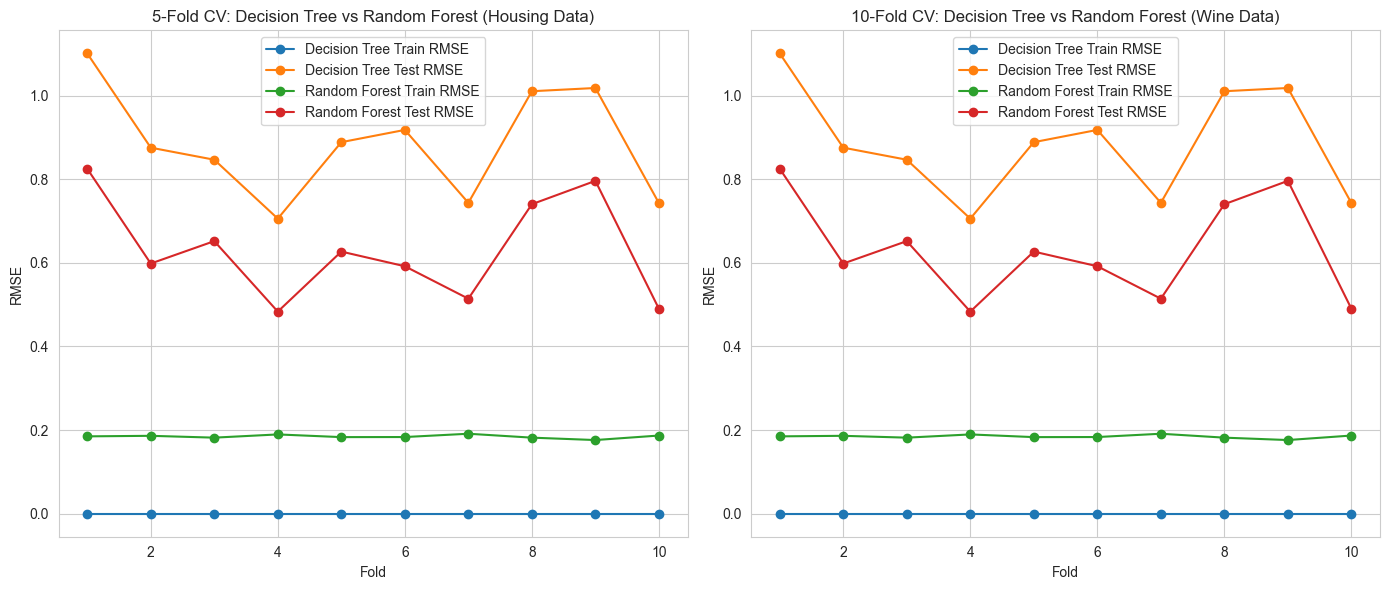

In [29]:
# 创建一个 1 行 2 列的子图布局
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 5折交叉验证的图（房价数据集）
axes[0].plot(range(1, 11), dt_train_rmse_cv, label='Decision Tree Train RMSE', marker='o')
axes[0].plot(range(1, 11), dt_test_rmse_cv, label='Decision Tree Test RMSE', marker='o')
axes[0].plot(range(1, 11), rf_train_rmse_cv, label='Random Forest Train RMSE', marker='o')
axes[0].plot(range(1, 11), rf_test_rmse_cv, label='Random Forest Test RMSE', marker='o')
axes[0].set_title('5-Fold CV: Decision Tree vs Random Forest (Housing Data)')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('RMSE')
axes[0].legend()
axes[0].grid(True)

# 10折交叉验证的图（葡萄酒数据集）
axes[1].plot(range(1, 11), dt_train_rmse_wine, label='Decision Tree Train RMSE', marker='o')
axes[1].plot(range(1, 11), dt_test_rmse_wine, label='Decision Tree Test RMSE', marker='o')
axes[1].plot(range(1, 11), rf_train_rmse_wine, label='Random Forest Train RMSE', marker='o')
axes[1].plot(range(1, 11), rf_test_rmse_wine, label='Random Forest Test RMSE', marker='o')
axes[1].set_title('10-Fold CV: Decision Tree vs Random Forest (Wine Data)')
axes[1].set_xlabel('Fold')
axes[1].set_ylabel('RMSE')
axes[1].legend()
axes[1].grid(True)

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

#### 【讨论二】随机森林中的 n_estimator 超参数如何选择？

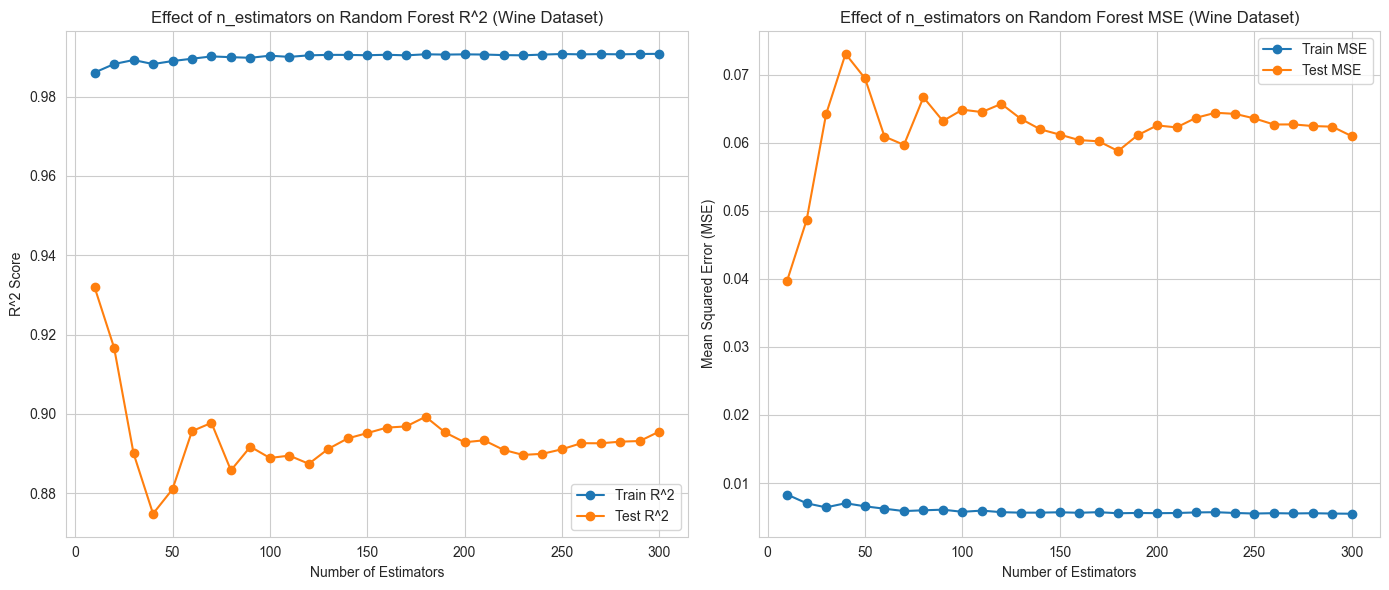

In [28]:
# n_estimators_range：基估计器数量范围
n_estimators_range = range(10, 301, 10)  # 从 10 到 300，步长为 10

# 初始化列表用于存储结果
train_scores = []  # 存储训练集 R^2 分数
test_scores = []   # 存储测试集 R^2 分数
train_mse = []     # 存储训练集 MSE
test_mse = []      # 存储测试集 MSE

# 循环遍历不同数量的基估计器
for n in n_estimators_range:
    # 创建随机森林模型
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    
    # 训练模型
    rf_model.fit(X_train_wine, y_train_wine)  # 使用葡萄酒数据集
    
    # 获取训练集和测试集上的预测结果
    train_preds = rf_model.predict(X_train_wine)
    test_preds = rf_model.predict(X_test_wine)  # 假设 X_test_wine 是测试集
    
    # 计算 R^2 分数（模型的准确度）
    train_scores.append(rf_model.score(X_train_wine, y_train_wine))  # R^2 分数
    test_scores.append(rf_model.score(X_test_wine, y_test_wine))     # R^2 分数
    
    # 计算均方误差（MSE）
    train_mse.append(mean_squared_error(y_train_wine, train_preds))  # 训练集 MSE
    test_mse.append(mean_squared_error(y_test_wine, test_preds))     # 测试集 MSE

# 绘制图形
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 左图：基估计器数量与 R^2 分数的关系
axes[0].plot(n_estimators_range, train_scores, label='Train R^2', marker='o')
axes[0].plot(n_estimators_range, test_scores, label='Test R^2', marker='o')
axes[0].set_title('Effect of n_estimators on Random Forest R^2 (Wine Dataset)')
axes[0].set_xlabel('Number of Estimators')
axes[0].set_ylabel('R^2 Score')
axes[0].legend()
axes[0].grid(True)

# 右图：基估计器数量与均方误差（MSE）的关系
axes[1].plot(n_estimators_range, train_mse, label='Train MSE', marker='o')
axes[1].plot(n_estimators_range, test_mse, label='Test MSE', marker='o')
axes[1].set_title('Effect of n_estimators on Random Forest MSE (Wine Dataset)')
axes[1].set_xlabel('Number of Estimators')
axes[1].set_ylabel('Mean Squared Error (MSE)')
axes[1].legend()
axes[1].grid(True)

# 调整子图布局
plt.tight_layout()

# 显示图形
plt.show()

【讨论三】对于 RandomForestRegressor 模型，自行选择超参数搜索的方法，找到合适的超参数，最终将超参数在如下的交叉验证集上进行建模，并计算 RMSE 评分。介绍调参过程，并比较调参前后的效果。

In [8]:
# 参数网格
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20]
}

# 初始化随机森林回归模型
rf_model = RandomForestRegressor(random_state=42)

# 使用 GridSearchCV 进行超参数调优
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 输出最佳超参数和对应的得分
print("最佳超参数:", grid_search.best_params_)
print("最佳交叉验证得分:", np.sqrt(-grid_search.best_score_))

# 使用最佳参数进行预测
best_rf_model = grid_search.best_estimator_
best_rf_preds = best_rf_model.predict(X_test)

# 计算最终 RMSE
final_rmse = np.sqrt(mean_squared_error(y_test, best_rf_preds))
print(f"调参后随机森林测试集 RMSE: {final_rmse:.4f}")

最佳超参数: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
最佳交叉验证得分: 0.5103566880124905
调参后随机森林测试集 RMSE: 0.5046
